# **17_tidying**
- 데이터 단정하게 만들기

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
a = np.arange(0, 15).reshape(5, 3)
tmp = pd.DataFrame(a, 
             index = ['a', 'b', 'c', 'd', 'e'],
             columns = ['c1', 'c2', 'c3'])

tmp

,c1,c2,c3
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11
e,12,13,14


In [ ]:
# 파일쓰기
tmp.to_csv('C:\python job.csv')

In [ ]:
# 실습하기. 방금 저장한 파일을 df라는 변수에 읽어주세요
# - 단, 형태는 tmp와 동일해야합니다.
df = pd.read_csv('C:\python job.csv', index_col = 0)
df

,c1,c2,c3
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11
e,12,13,14


In [ ]:
# 데이터에 결측치 만들기
# - c4열 생성하며 결측치 만들기
df['c4'] = np.nan
df

,c1,c2,c3,c4
a,0,1,2,NaN
b,3,4,5,NaN
c,6,7,8,NaN
d,9,10,11,NaN
e,12,13,14,NaN


In [ ]:
# f행을 추가하면서 값 넣기
df.loc['f', :] = np.arange(15, 19)
df

,c1,c2,c3,c4
a,0.0,1.0,2.0,NaN
b,3.0,4.0,5.0,NaN
c,6.0,7.0,8.0,NaN
d,9.0,10.0,11.0,NaN
e,12.0,13.0,14.0,NaN
f,15.0,16.0,17.0,18.0
g,NaN,NaN,NaN,NaN


In [ ]:
# 실습하기. g행을 만들면서 NA를 채워주세요
df.loc['g', :] = np.nan
df

,c1,c2,c3,c4
a,0.0,1.0,2.0,NaN
b,3.0,4.0,5.0,NaN
c,6.0,7.0,8.0,NaN
d,9.0,10.0,11.0,NaN
e,12.0,13.0,14.0,NaN
f,15.0,16.0,17.0,18.0
g,NaN,NaN,NaN,NaN


In [ ]:
# 실습하기. a행의 c4의 값을 20으로 채워주세요
df.loc['a', 'c4'] = 20
df

,c1,c2,c3,c4
a,0.0,1.0,2.0,20.0
b,3.0,4.0,5.0,NaN
c,6.0,7.0,8.0,NaN
d,9.0,10.0,11.0,NaN
e,12.0,13.0,14.0,NaN
f,15.0,16.0,17.0,18.0
g,NaN,NaN,NaN,NaN


In [ ]:
# na 검사하기
df.isnull()
# na 값 확인하기
df.isnull().sum()

c1    1
c2    1
c3    1
c4    5
dtype: int64

In [ ]:
# 결측치를 제외하고 조회하기
df.c4.dropna()

a    20.0
f    18.0
Name: c4, dtype: float64

In [ ]:
# 결측치가 없는 데이터들만
df.dropna()

,c1,c2,c3,c4
a,0.0,1.0,2.0,20.0
f,15.0,16.0,17.0,18.0


In [ ]:
# 결측치 채우기
df.fillna(0) # 결측치를 0으로 채우기

,c1,c2,c3,c4
a,0.0,1.0,2.0,20.0
b,3.0,4.0,5.0,0.0
c,6.0,7.0,8.0,0.0
d,9.0,10.0,11.0,0.0
e,12.0,13.0,14.0,0.0
f,15.0,16.0,17.0,18.0
g,0.0,0.0,0.0,0.0


In [ ]:
df

,c1,c2,c3,c4
a,0.0,1.0,2.0,20.0
b,3.0,4.0,5.0,NaN
c,6.0,7.0,8.0,NaN
d,9.0,10.0,11.0,NaN
e,12.0,13.0,14.0,NaN
f,15.0,16.0,17.0,18.0
g,NaN,NaN,NaN,NaN


In [ ]:
# na값을 이전 컬럼의 값으로 채우기
df.fillna(method = 'ffill') # NaN이 발생하기 전의 값으로 채워짐

,c1,c2,c3,c4
a,0.0,1.0,2.0,20.0
b,3.0,4.0,5.0,20.0
c,6.0,7.0,8.0,20.0
d,9.0,10.0,11.0,20.0
e,12.0,13.0,14.0,20.0
f,15.0,16.0,17.0,18.0
g,15.0,16.0,17.0,18.0


In [ ]:
# na값을 이후 컬럼의 값으로 채우기
df.fillna(method = 'bfill') # NaN이 발생한 후의 값으로 채워짐

,c1,c2,c3,c4
a,0.0,1.0,2.0,20.0
b,3.0,4.0,5.0,18.0
c,6.0,7.0,8.0,18.0
d,9.0,10.0,11.0,18.0
e,12.0,13.0,14.0,18.0
f,15.0,16.0,17.0,18.0
g,NaN,NaN,NaN,NaN


### **자동채우기**
- interpolation

In [ ]:
s = pd.Series([1, np.nan, np.nan, np.nan, 2])
s

0    1.0
1    NaN
2    NaN
3    NaN
4    2.0
dtype: float64

In [ ]:
s.interpolate()

0    1.00
1    1.25
2    1.50
3    1.75
4    2.00
dtype: float64

In [ ]:
import datetime
from datetime import datetime

In [ ]:
# 시계를 갖는 데이터 프레임
s1 = pd.Series([1, np.nan, 2], index = [datetime(2022, 1, 1), datetime(2022, 2, 1), datetime(2022, 4, 1)])

s1

2022-01-01    1.0
2022-02-01    NaN
2022-04-01    2.0
dtype: float64

In [ ]:
s1.interpolate(method = 'time')

2022-01-01    1.000000
2022-02-01    1.344444
2022-04-01    2.000000
dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [ ]:
x = np.arange(-2, 2, 0.05) # 80개 데이터
y = (lambda x: 1 / np.sqrt(2 * np.pi) / np.exp(x ** 2 / 2))(x)

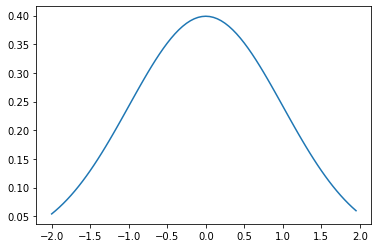

In [ ]:
plt.plot(x, y)

In [ ]:
# 임의의 데이터 10개 삭제하기
idx = np.random.choice(len(x), size = 10)
x[idx] = np.nan

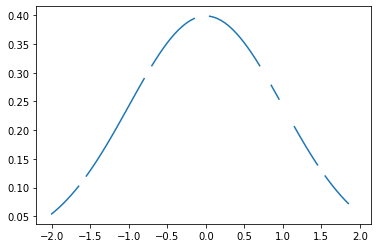

In [ ]:
plt.plot(x, y)

In [ ]:
# 실습하기. x의 결측치를 확인해주세요
pd.Series(x).isnull().sum()

10

In [ ]:
# 실습하기. x를 자동채우기 실행해주세요
pd.Series(x).interpolate()

0    -2.00
1    -1.95
2    -1.90
3    -1.85
4    -1.80
      ... 
75    1.75
76    1.80
77    1.85
78    1.90
79    1.95
Length: 80, dtype: float64

In [ ]:
x_inter = pd.Series(x).interpolate()

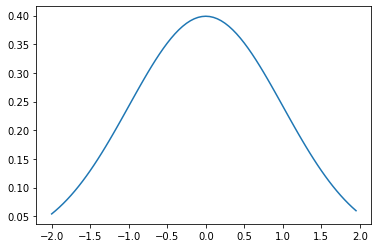

In [ ]:
plt.plot(x_inter, y)

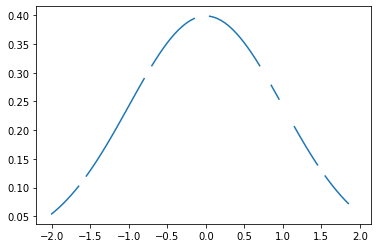

In [ ]:
plt.plot(x, y)

### **중복치 제거하기**
- 동일한 데이터가 존재하는 경우

In [ ]:
a = ['x'] * 3 + ['y'] * 4
b = [1, 1, 2, 3, 3, 4, 4]
b

[1, 1, 2, 3, 3, 4, 4]

In [ ]:
data = pd.DataFrame({"a":a, "b":b})
data

,a,b
0,x,1
1,x,1
2,x,2
3,y,3
4,y,3
5,y,4
6,y,4


In [ ]:
# 중복데이터 확인
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [ ]:
# 실습하기. 중복데이터 제거
data.drop_duplicates()

,a,b
0,x,1
2,x,2
3,y,3
5,y,4


In [ ]:
# c열을 추가해서 중복없애기
data['c'] = range(7)
data

,a,b,c
0,x,1,0
1,x,1,1
2,x,2,2
3,y,3,3
4,y,3,4
5,y,4,5
6,y,4,6


In [ ]:
data.drop_duplicates()

,a,b,c
0,x,1,0
1,x,1,1
2,x,2,2
3,y,3,3
4,y,3,4
5,y,4,5
6,y,4,6


In [ ]:
# 실습하기. 특정 열을 선택해서 중복 제거
# - a와 b열을 대상으로 중복 제거를 실행해주세요.
data.drop_duplicates(['a', 'b'])

,a,b,c
0,x,1,0
2,x,2,2
3,y,3,3
5,y,4,5
